<a href="https://colab.research.google.com/github/satriayyp/PCVK_Ganjil_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

no.1

 Simulasi Image Depth  
--------------------------
Masukkan nilai depth bit: 15


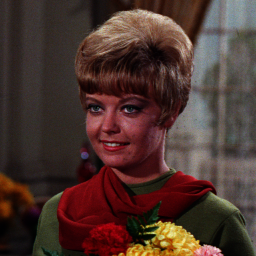

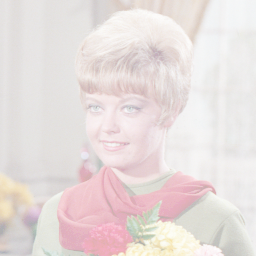

(None, None)

In [8]:

print(' Simulasi Image Depth  ')
print('--------------------------')
try:
  db = float(input('Masukkan nilai depth bit: '))
except ValueError:
  print('Error, not a number')
# Baca gambar
ori= cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/female.tiff')



# Melakukan gamma correction dengan nilai gamma baru
corrected_image = 255*(ori / 255)**(1/db)


corrected_image = np.uint8(corrected_image)
# Simpan gambar yang telah diperbaiki
cv2_imshow(ori), cv2_imshow(corrected_image)



no.2

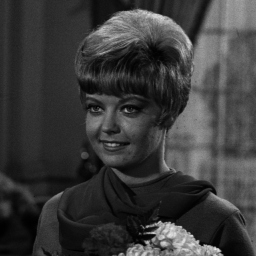

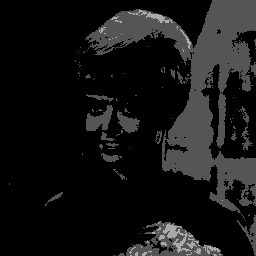

In [17]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int((original[i, j] // level) * level)

cv2_imshow(original)
cv2_imshow(depth_image)

no.3

 Simulasi averege denosing  
--------------------------
Masukkan jumlah citra: 80
Nilai PSNR adalah 27.50665299023914 (dB)


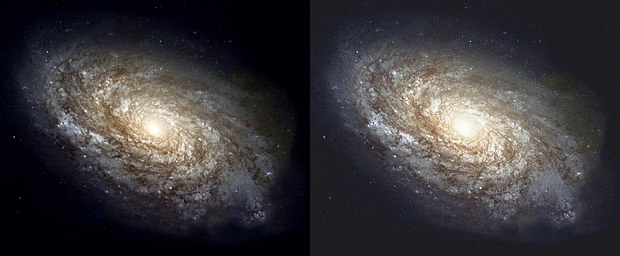

In [37]:
import glob
from math import log10, sqrt

ori = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Colab Notebooks/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

print(' Simulasi averege denosing  ')
print('--------------------------')
try:
  noise_number = int(input('Masukkan jumlah citra: '))
except ValueError:
  print('Error, not a number')

def PSNR(ori, compres):
    mse = np.mean((ori - compres) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

dst = cv_img[0]

for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)



compres = dst
psnr = PSNR(ori, compres)

print('Nilai PSNR adalah',psnr,'(dB)')
g_frame = cv.hconcat((ori, dst))
cv2_imshow(g_frame)



no.4

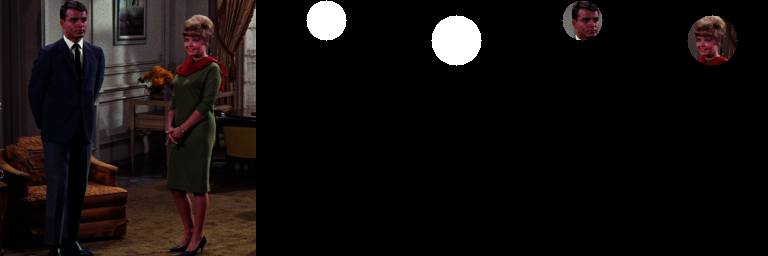

In [96]:
#NO.4

# Baca gambar asli
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/couple.tiff')

# Konversi gambar ke format warna HSV
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,20), 20, (255,255,255), -1)
mask1 = cv.circle(mask, (200,40), 25, (255,255,255), -1)
result = image & mask

org_frame = cv.hconcat((image, mask, result))
cv2_imshow(org_frame)

no.5

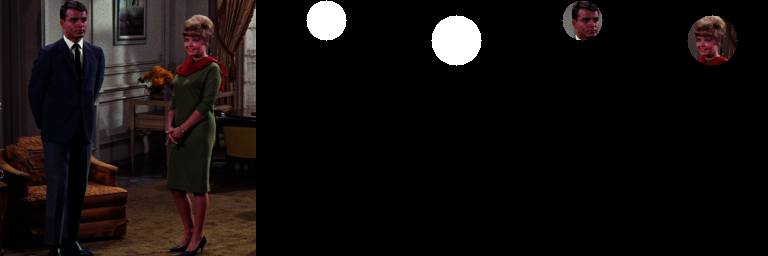

In [85]:
#and

# Baca gambar asli
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/couple.tiff')

# Konversi gambar ke format warna HSV
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,20), 20, (255,255,255), -1)
mask1 = cv.circle(mask, (200,40), 25, (255,255,255), -1)
result = image & mask

org_frame = cv.hconcat((image, mask, result))
cv2_imshow(org_frame)

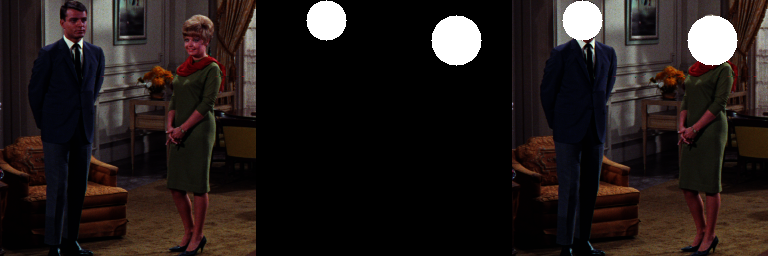

In [84]:
# OR
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/couple.tiff')

# Konversi gambar ke format warna HSV
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,20), 20, (255,255,255), -1)
mask1 = cv.circle(mask, (200,40), 25, (255,255,255), -1)
result = image | mask

couple_frame = cv.hconcat((image,mask, result))
cv2_imshow(couple_frame)

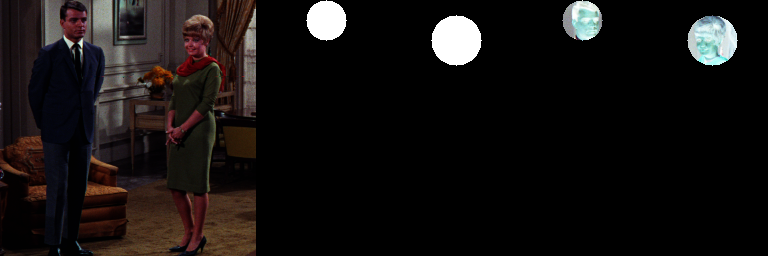

In [92]:
# XOR
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/couple.tiff')

# Konversi gambar ke format warna HSV
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,20), 20, (255,255,255), -1)
mask1 = cv.circle(mask, (200,40), 25, (255,255,255), -1)
result = ~image & (mask | mask)

org_frame = cv.hconcat((image,mask, result))
cv2_imshow(org_frame)

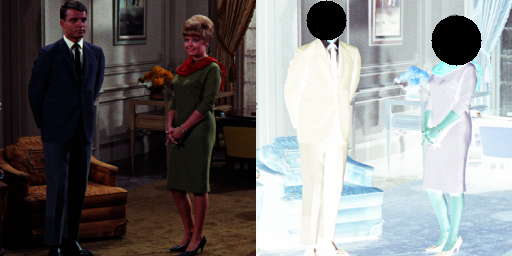

In [95]:
# NOT
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/couple.tiff')

# Konversi gambar ke format warna HSV
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,20), 20, (255,255,255), -1)
mask1 = cv.circle(mask, (200,40), 25, (255,255,255), -1)
result = ~image & ~mask

org_frame = cv.hconcat((image, result))
cv2_imshow(org_frame)

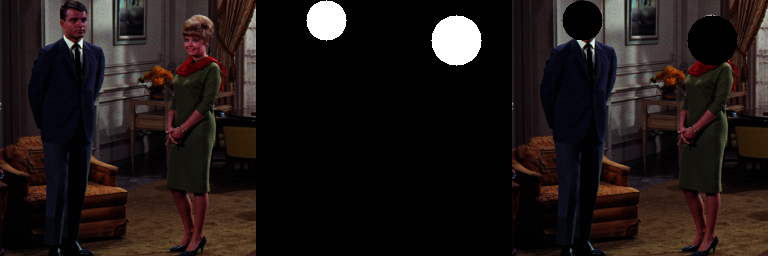

In [87]:
# NAND
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/couple.tiff')

# Konversi gambar ke format warna HSV
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,20), 20, (255,255,255), -1)
mask1 = cv.circle(mask, (200,40), 25, (255,255,255), -1)
result = image ^ (image & mask)

org_frame = cv.hconcat((image,mask, result))
cv2_imshow(org_frame)

In [ ]:
#tugas
image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/couple.tiff')

# Konversi gambar ke format warna HSV
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv.circle(mask, (70,20), 20, (255,255,255), -1)
mask1 = cv.circle(mask, (200,40), 25, (255,255,255), -1)
result = image ^ (image & mask)

org_frame = cv.hconcat((image,mask, result))
cv2_imshow(org_frame)